In [1]:
import networkx as nx
import math
import numpy as np
import matplotlib.pyplot as plt

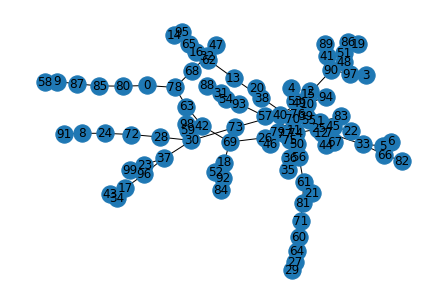

In [2]:
tree = nx.random_tree(n=100, seed = 0)
nx.draw(tree, with_labels=True)

In [3]:
Frechet_mean = -1
y_hat = -1
for node in list(tree.nodes):
    node_dist = 0
    for target in list(tree.nodes):
        dist = nx.shortest_path_length(tree, source=node, target=target)
        node_dist += 1 * dist **2
    if Frechet_mean == -1:
        Frechet_mean = node_dist
        y_hat = node 
    else:
        if Frechet_mean > node_dist:
            Frechet_mean = node_dist
            y_hat = node
print(Frechet_mean, y_hat)

4821 36


In [4]:
def generate_lambda(theta, m):
    z = 0
    for node in list(tree.nodes):
        z_temp = math.exp(-theta * nx.shortest_path_length(tree, source=node, target=y_hat))
        z += z_temp
    p_list = []
    for node in list(tree.nodes):
        p = 1/z * math.exp(-theta * nx.shortest_path_length(tree, source=node, target=y_hat))
        p_list.append(p)
    array = np.array(list(tree.nodes))
    Lambda = np.random.choice(array, m, replace=False, p = p_list)
    return Lambda

In [5]:
def generate_locus(Lambda):
    locus = []
    for i in range(len(Lambda)):
        for j in range(i+1, len(Lambda)):
            for path in nx.all_simple_paths(tree,Lambda[i], Lambda[j]):
                for node in path:
                    if node not in locus:
                        locus.append(node)
    return locus

In [6]:
m = 30
theta_list = []
theta = 0
while theta <= 4:
    theta_list.append(theta)
    theta += 0.1

In [7]:
locus_list = []
error_bar = []
for theta in theta_list:
    total_locus = 0
    sample = []
    for i in range(10):
        Lambda = generate_lambda(theta, m)
        locus = generate_locus(Lambda)
        total_locus += len(locus)
        sample.append(len(locus))
    avg_locus = total_locus/10
    error = np.quantile(sample, 0.75) -  np.quantile(sample, 0.25)
    locus_list.append(avg_locus)
    error_bar.append(error)

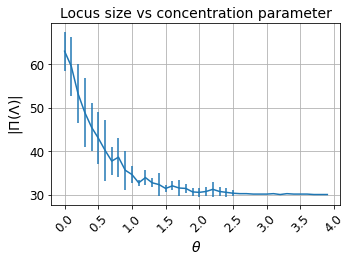

In [15]:
ticksize=12
plt.rcParams["figure.figsize"] = (5,3.5)
plt.rcParams['xtick.labelsize'] = ticksize 
plt.rcParams['ytick.labelsize'] = ticksize 
linewidth = 4
fontsize=14
plt.errorbar(theta_list, locus_list, yerr = error_bar)
plt.ylabel(r'$|\Pi(\Lambda)|$', fontsize=fontsize)
plt.xlabel(r'$\theta$', fontsize=fontsize)
plt.xticks(np.arange(0, 4.1, step=0.5), rotation=45)
plt.tight_layout()
plt.grid()
plt.title('Locus size vs concentration parameter', fontsize=fontsize)
plt.savefig('locus_theta.pdf', bbox_inches='tight')

In [11]:
np.savez('label_sampling_vector.npz', theta_list = theta_list,
     locus_list = locus_list,  error_bar = error_bar)